In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Travel.csv')

In [6]:
df.shape

(4888, 20)

In [7]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [9]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [10]:
df.Gender

0       Female
1         Male
2         Male
3       Female
4         Male
         ...  
4883      Male
4884      Male
4885    Female
4886      Male
4887      Male
Name: Gender, Length: 4888, dtype: object

In [11]:
df.Gender.unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [12]:
df.replace('Fe Male','Female',inplace=True)

In [13]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [14]:
df.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
CustomerID                    0
ProdTaken                     0
Gender                        0
CityTier                      0
ProductPitched                0
NumberOfPersonVisiting        0
Occupation                    0
MaritalStatus                 0
PitchSatisfactionScore        0
Passport                      0
OwnCar                        0
Designation                   0
dtype: int64

In [15]:
round(100*(df.isnull().sum()/len(df.index)),2)

CustomerID                  0.00
ProdTaken                   0.00
Age                         4.62
TypeofContact               0.51
CityTier                    0.00
DurationOfPitch             5.14
Occupation                  0.00
Gender                      0.00
NumberOfPersonVisiting      0.00
NumberOfFollowups           0.92
ProductPitched              0.00
PreferredPropertyStar       0.53
MaritalStatus               0.00
NumberOfTrips               2.86
Passport                    0.00
PitchSatisfactionScore      0.00
OwnCar                      0.00
NumberOfChildrenVisiting    1.35
Designation                 0.00
MonthlyIncome               4.77
dtype: float64

In [16]:
df.dropna(axis=0,inplace=True)

In [17]:
round(100*(df.isnull().sum()/len(df.index)),2)

CustomerID                  0.0
ProdTaken                   0.0
Age                         0.0
TypeofContact               0.0
CityTier                    0.0
DurationOfPitch             0.0
Occupation                  0.0
Gender                      0.0
NumberOfPersonVisiting      0.0
NumberOfFollowups           0.0
ProductPitched              0.0
PreferredPropertyStar       0.0
MaritalStatus               0.0
NumberOfTrips               0.0
Passport                    0.0
PitchSatisfactionScore      0.0
OwnCar                      0.0
NumberOfChildrenVisiting    0.0
Designation                 0.0
MonthlyIncome               0.0
dtype: float64

In [18]:
df.shape

(4128, 20)

In [19]:
cats = ['ProdTaken', 'CityTier', 'PreferredPropertyStar', 'Passport',
        'OwnCar', 'PitchSatisfactionScore', 'TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
        'MaritalStatus', 'Designation']
nums = ['CustomerID', 'Age', 'DurationOfPitch',
        'NumberOfPersonVisiting', 'NumberOfFollowups',
        'NumberOfTrips',
        'NumberOfChildrenVisiting', 'MonthlyIncome']

In [20]:
nums

['CustomerID',
 'Age',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

# Univariate Analysis

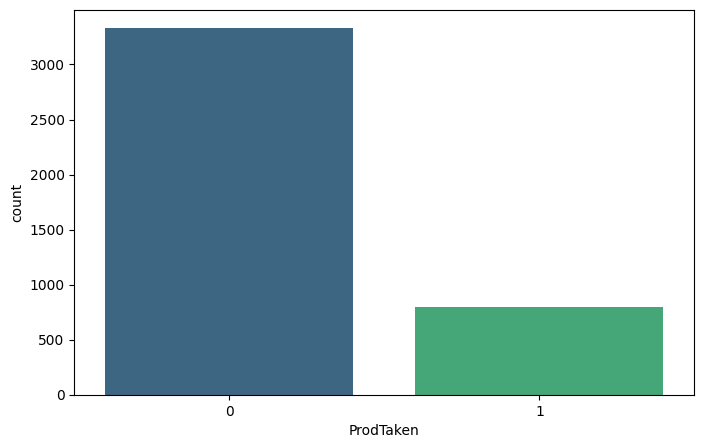

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='ProdTaken',data=df,palette='viridis')
plt.show()

In [22]:
cats

['ProdTaken',
 'CityTier',
 'PreferredPropertyStar',
 'Passport',
 'OwnCar',
 'PitchSatisfactionScore',
 'TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

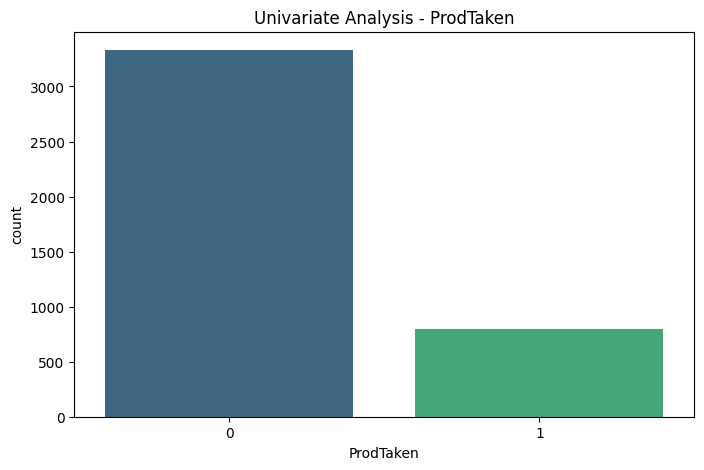

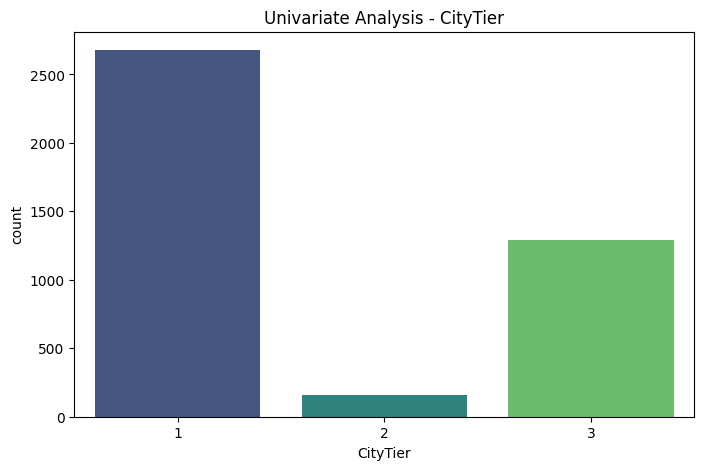

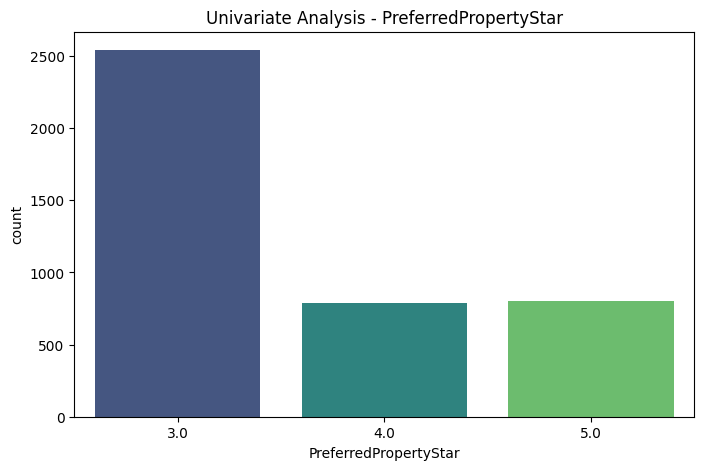

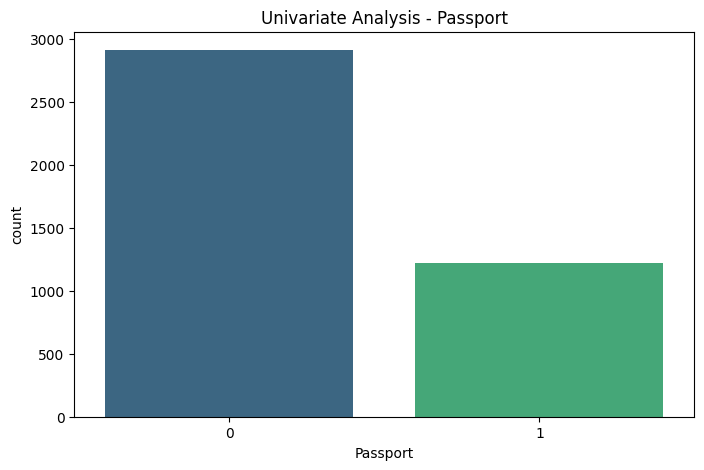

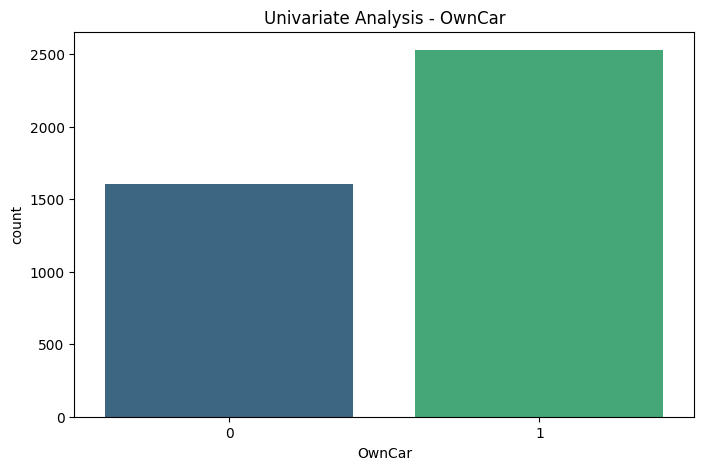

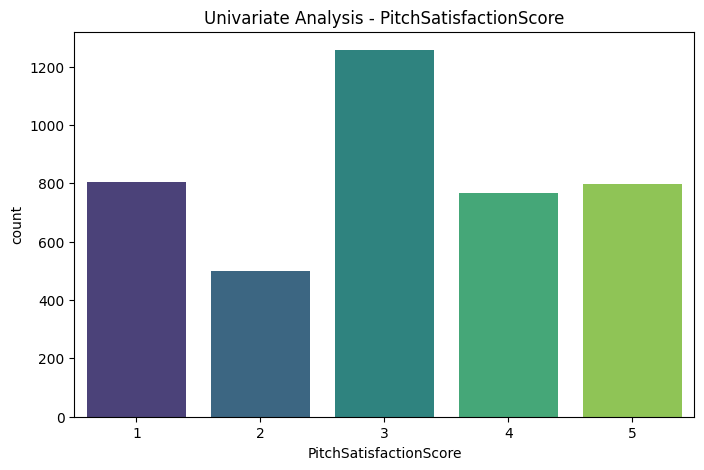

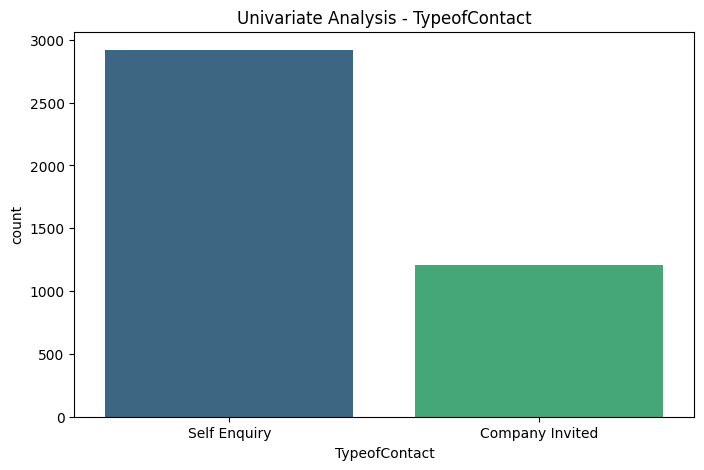

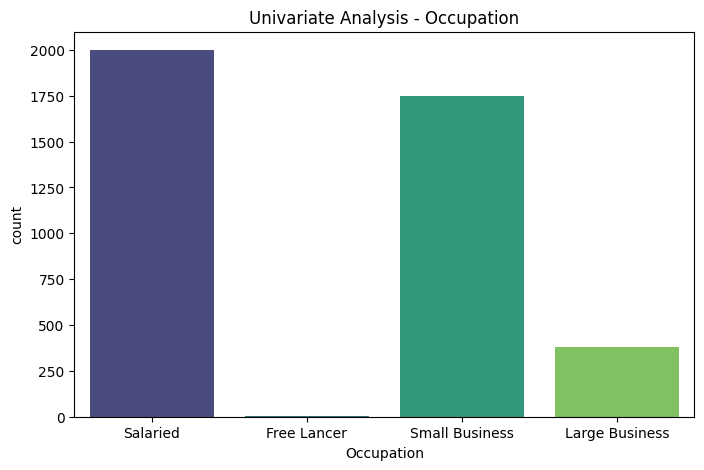

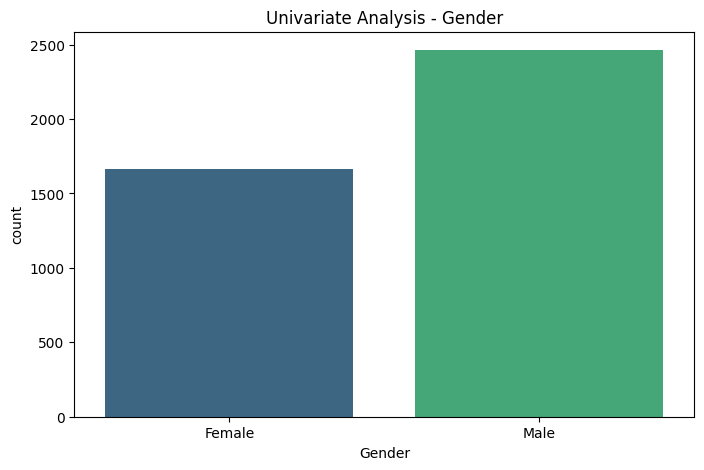

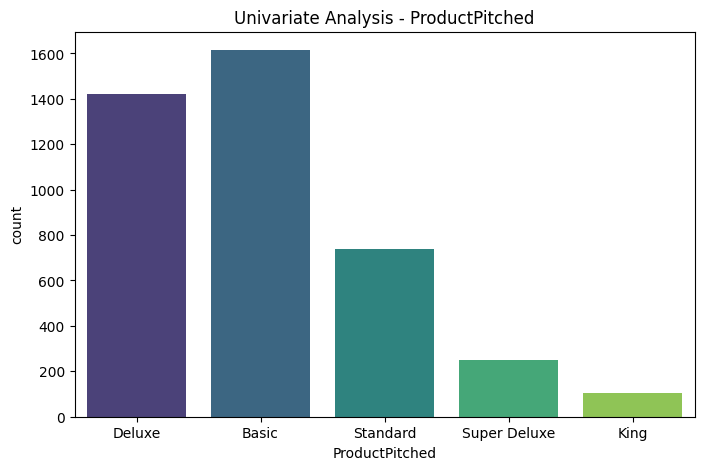

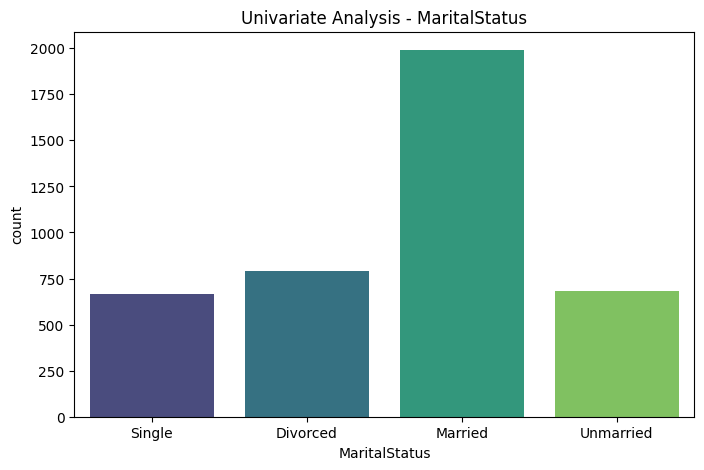

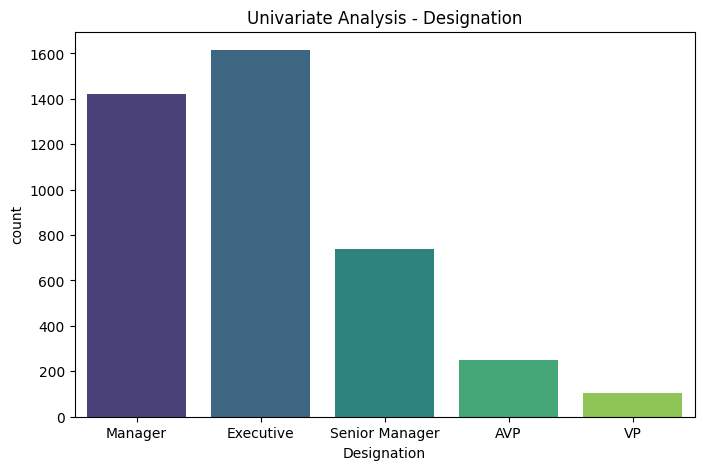

In [23]:
for cat_col in cats:
    plt.figure(figsize=(8,5))
    sns.countplot(x=cat_col,data=df,palette='viridis')
    plt.title(f"Univariate Analysis - {cat_col}")
    plt.show()

# Univariate Analysis for numerical columns

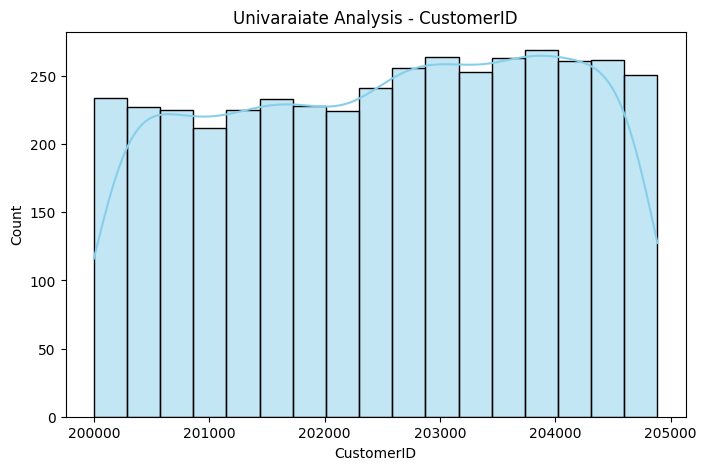

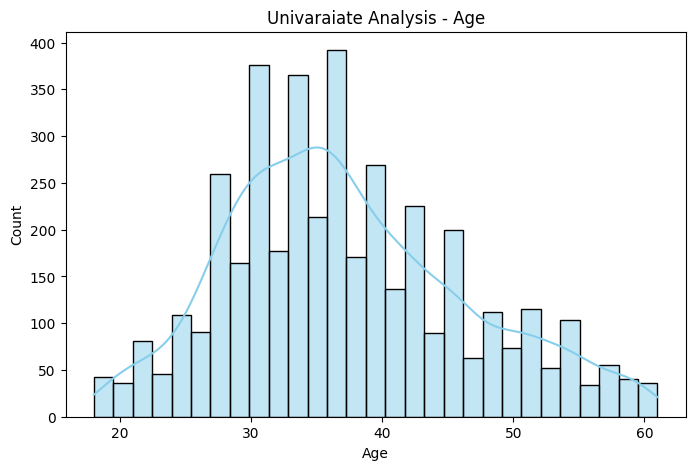

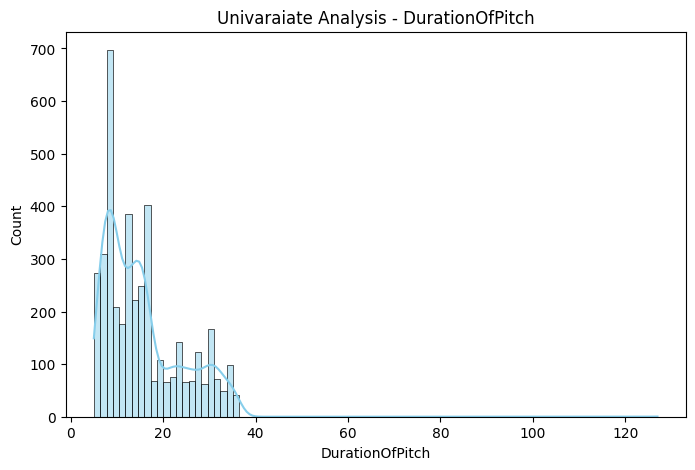

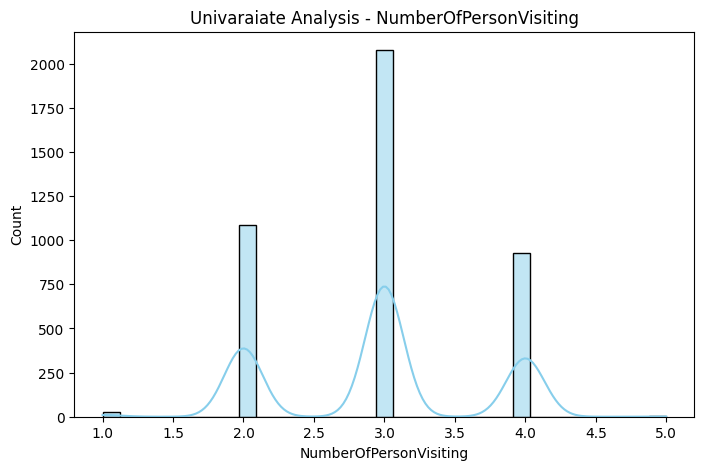

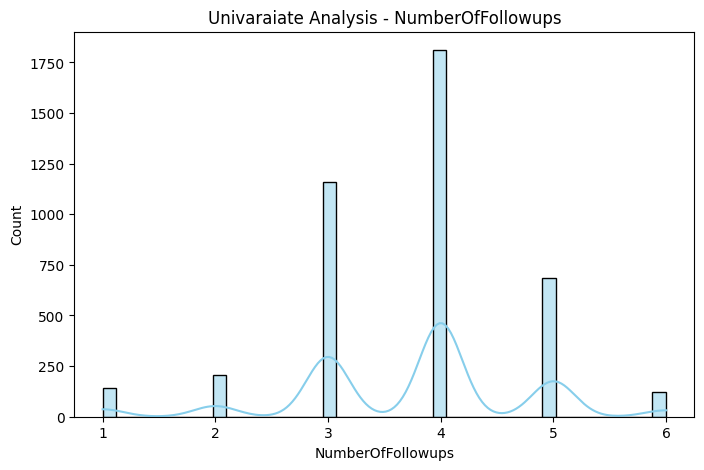

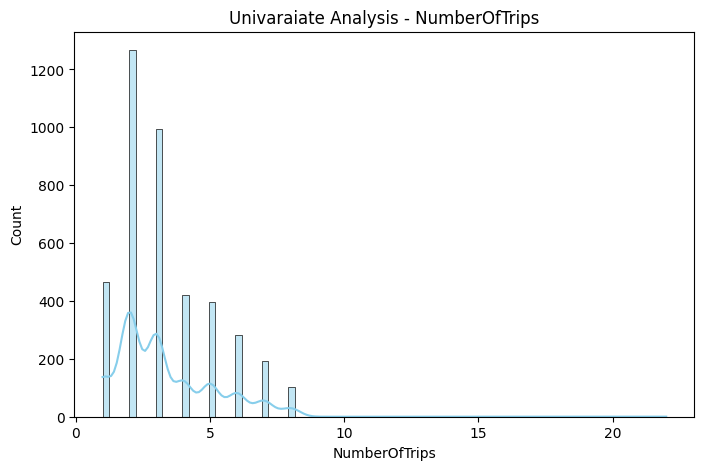

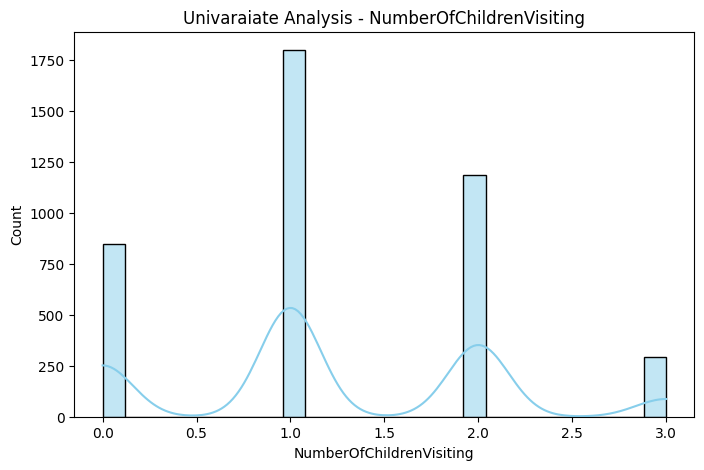

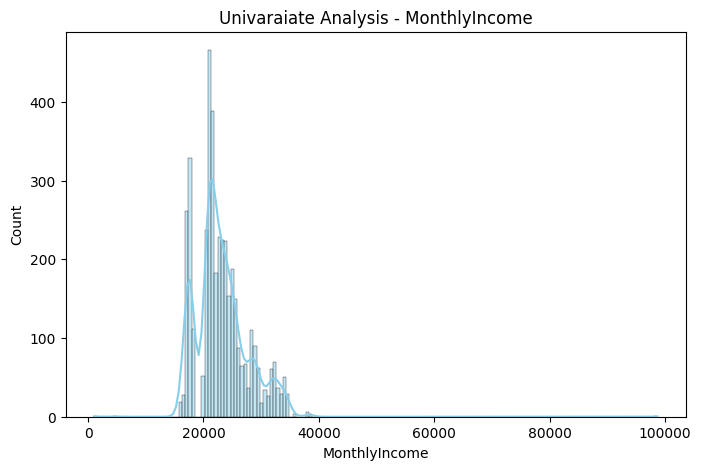

In [24]:
for num_col in nums:
    plt.figure(figsize=(8,5))
    sns.histplot(df[num_col],kde=True,color='skyblue')
    plt.title(f'Univaraiate Analysis - {num_col}')

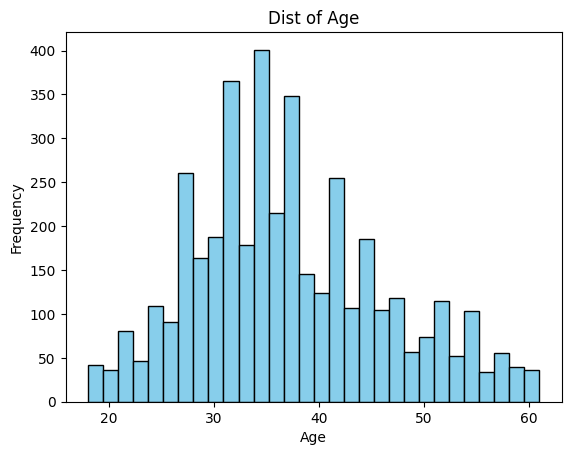

In [25]:
plt.hist(df['Age'].dropna(),bins=30,color='skyblue',edgecolor='black')
plt.title('Dist of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

People in 30-40 age group are travelling more.

In [26]:
df.TypeofContact

0          Self Enquiry
1       Company Invited
2          Self Enquiry
3       Company Invited
5       Company Invited
             ...       
4883       Self Enquiry
4884    Company Invited
4885       Self Enquiry
4886       Self Enquiry
4887       Self Enquiry
Name: TypeofContact, Length: 4128, dtype: object

<Axes: xlabel='TypeofContact', ylabel='count'>

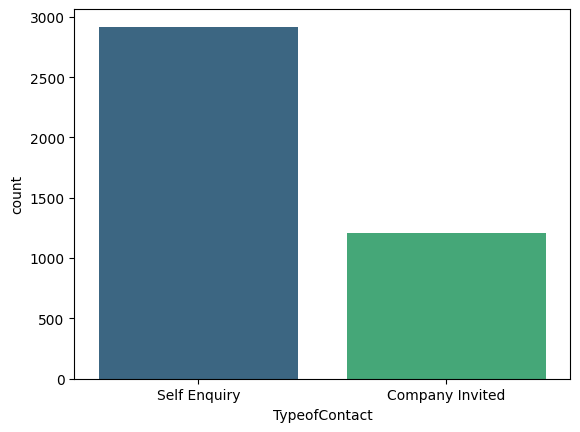

In [27]:
sns.countplot(x='TypeofContact',data=df,palette='viridis')

In [28]:
cats

['ProdTaken',
 'CityTier',
 'PreferredPropertyStar',
 'Passport',
 'OwnCar',
 'PitchSatisfactionScore',
 'TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [29]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0


In [30]:
df.CityTier.unique()

array([3, 1, 2])

In [31]:
cats

['ProdTaken',
 'CityTier',
 'PreferredPropertyStar',
 'Passport',
 'OwnCar',
 'PitchSatisfactionScore',
 'TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [32]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.0000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,202527.763808,0.193072,37.231831,1.663275,15.584787,2.949370,3.741521,3.578488,3.2953,0.295300,3.060804,0.612161,1.223595,23178.464147
std,1409.439133,0.394757,9.174521,0.920640,8.398142,0.718818,1.006786,0.795031,1.8563,0.456233,1.363064,0.487317,0.852685,4506.614622
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.0000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201320.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.0000,0.000000,2.000000,0.000000,1.000000,20751.000000
50%,202603.500000,0.000000,36.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.0000,0.000000,3.000000,1.000000,1.000000,22418.000000
75%,203748.250000,0.000000,43.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.0000,1.000000,4.000000,1.000000,2.000000,25301.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.0000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [33]:
# Average of 1.66 for CityTier doesn't make any sense

In [34]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4128.0,202527.763808,1409.439133,200000.0,201320.75,202603.5,203748.25,204887.0
Age,4128.0,37.231831,9.174521,18.0,31.00,36.0,43.00,61.0
DurationOfPitch,4128.0,15.584787,8.398142,5.0,9.00,14.0,20.00,127.0
NumberOfPersonVisiting,4128.0,2.949370,0.718818,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4128.0,3.741521,1.006786,1.0,3.00,4.0,4.00,6.0
NumberOfTrips,4128.0,3.295300,1.856300,1.0,2.00,3.0,4.00,22.0
NumberOfChildrenVisiting,4128.0,1.223595,0.852685,0.0,1.00,1.0,2.00,3.0
MonthlyIncome,4128.0,23178.464147,4506.614622,1000.0,20751.00,22418.0,25301.00,98678.0


In [35]:
df[cats].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4128.0,0.193072,0.394757,0.0,0.0,0.0,0.0,1.0
CityTier,4128.0,1.663275,0.920640,1.0,1.0,1.0,3.0,3.0
PreferredPropertyStar,4128.0,3.578488,0.795031,3.0,3.0,3.0,4.0,5.0
Passport,4128.0,0.295300,0.456233,0.0,0.0,0.0,1.0,1.0
OwnCar,4128.0,0.612161,0.487317,0.0,0.0,1.0,1.0,1.0
PitchSatisfactionScore,4128.0,3.060804,1.363064,1.0,2.0,3.0,4.0,5.0


In [36]:
# All of the above columns are discrete but in terms of business mean values
# of above column doesn't make sense
# So these columns are to be treated as a categorical column
# Hence we will convert them to categorical columns

In [37]:
df[cats] = df[cats].astype('object')

In [38]:
df[cats].describe().T

,count,unique,top,freq
ProdTaken,4128,2,0,3331
CityTier,4128,3,1,2678
PreferredPropertyStar,4128.0,3.0,3.0,2541.0
Passport,4128,2,0,2909
OwnCar,4128,2,1,2527
PitchSatisfactionScore,4128,5,3,1257
TypeofContact,4128,2,Self Enquiry,2918
Occupation,4128,4,Salaried,1999
Gender,4128,2,Male,2463
ProductPitched,4128,5,Basic,1615


In [39]:
for col in df[cats].columns:
    x = df[col].unique()
    print(f'{col}: {x}')

ProdTaken: [1 0]
CityTier: [3 1 2]
PreferredPropertyStar: [3.0 4.0 5.0]
Passport: [1 0]
OwnCar: [1 0]
PitchSatisfactionScore: [2 3 5 4 1]
TypeofContact: ['Self Enquiry' 'Company Invited']
Occupation: ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
Gender: ['Female' 'Male']
ProductPitched: ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
MaritalStatus: ['Single' 'Divorced' 'Married' 'Unmarried']
Designation: ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']


# Bivariate Analysis

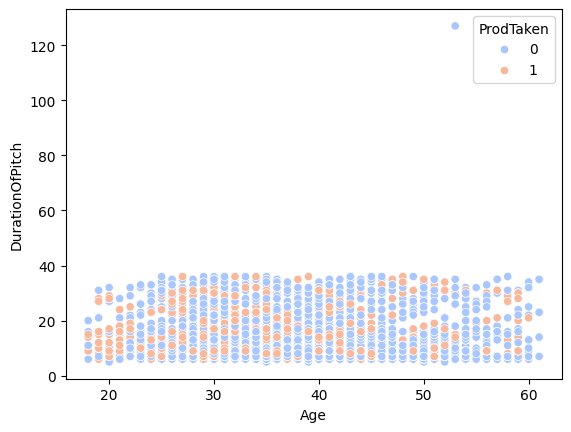

In [40]:
sns.scatterplot(x='Age',y='DurationOfPitch',data=df,hue='ProdTaken',palette='coolwarm')
plt.show()

In [41]:
# Stacked Bar Chart

In [42]:
cross_tab = pd.crosstab(df['MaritalStatus'],df['ProdTaken'],normalize='index')

In [43]:
cross_tab

ProdTaken,0,1
MaritalStatus,,
Divorced,0.866920,0.133080
Married,0.857789,0.142211
Single,0.635682,0.364318
Unmarried,0.756598,0.243402


<Axes: xlabel='MaritalStatus'>

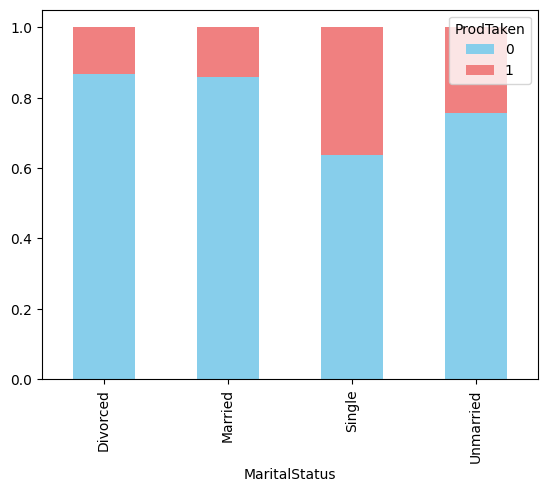

In [44]:
cross_tab.plot(kind='bar',stacked=True,color=['skyblue','lightcoral'])

In [45]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

<Axes: xlabel='ProductPitched', ylabel='PitchSatisfactionScore'>

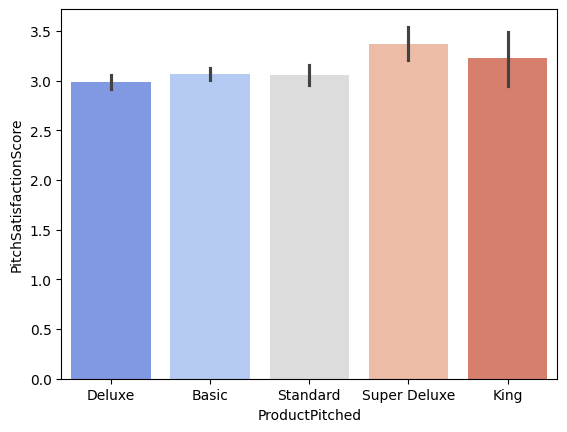

In [46]:
sns.barplot(x='ProductPitched',y='PitchSatisfactionScore',data=df,palette='coolwarm')

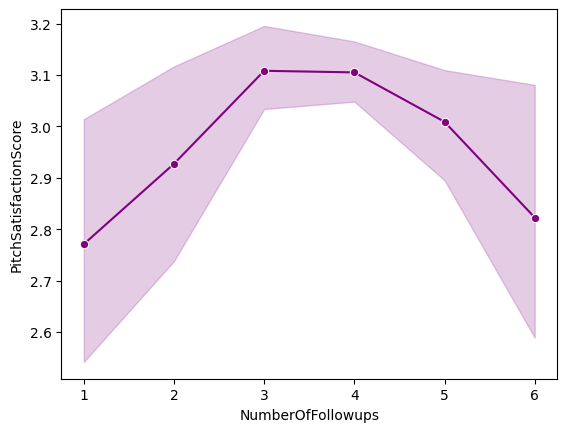

In [47]:
sns.lineplot(x='NumberOfFollowups',y='PitchSatisfactionScore',data=df,marker='o',color='purple')
plt.show()

# Multivariate Analysis

<Axes: xlabel='ProdTaken', ylabel='Age'>

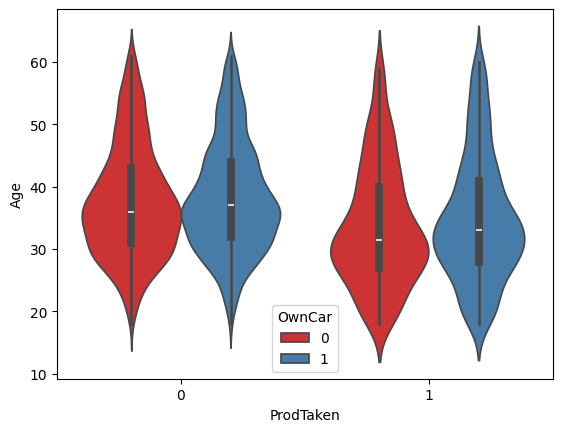

In [48]:
sns.violinplot(x='ProdTaken',y='Age',data=df,hue='OwnCar',palette='Set1')

<Axes: xlabel='Gender', ylabel='Age'>

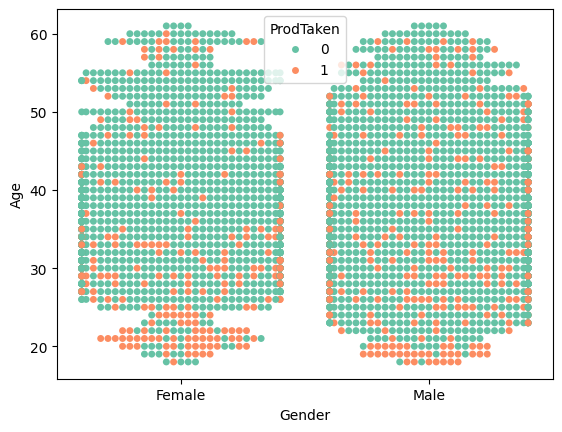

In [49]:
sns.swarmplot(x='Gender',y='Age',data=df,hue='ProdTaken',palette='Set2')

# 3D Plots

In [50]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3d plot')

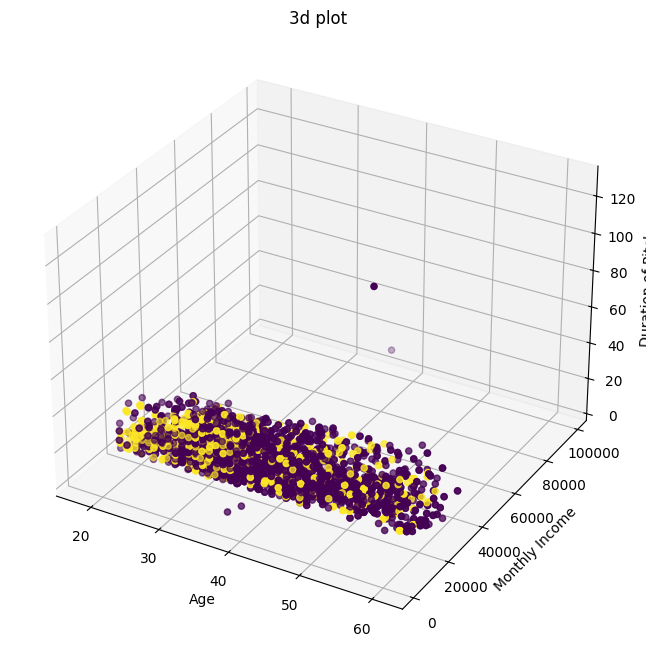

In [51]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['Age'],df['MonthlyIncome'],df['DurationOfPitch'],c=df['ProdTaken'],cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Monthly Income')
ax.set_zlabel('Duration of Pitch')
ax.set_title('3d plot')

<Axes: >

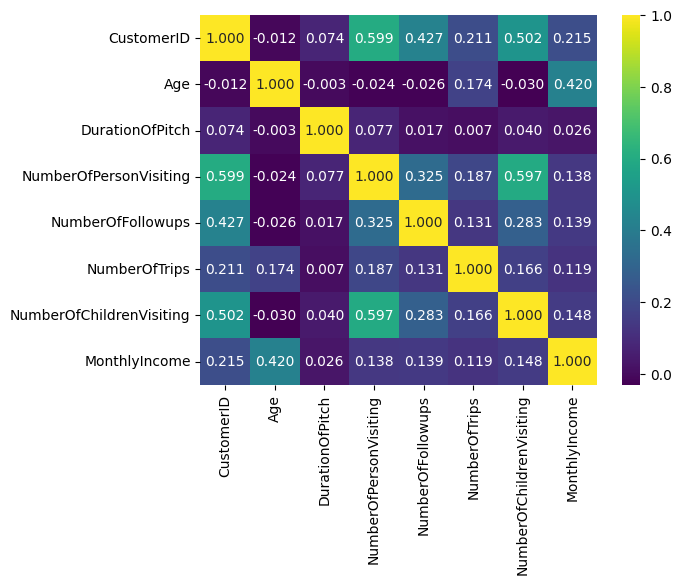

In [52]:
numeric_cols = df.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(),cmap='viridis',annot=True,fmt='.3f')

# Feature Engineering

In [53]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0


In [54]:
df.drop('CustomerID',axis=1,inplace=True)

In [55]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0


In [56]:
df['TotalVisiting'] = df.NumberOfChildrenVisiting + df.NumberOfPersonVisiting

In [57]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
5,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0,4.0


In [58]:
df.drop(columns=['NumberOfChildrenVisiting','NumberOfPersonVisiting'],axis=1,inplace=True)

In [59]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
5,0,32.0,Company Invited,1,8.0,Salaried,Male,3.0,Basic,3.0,Single,1.0,0,5,1,Executive,18068.0,4.0


In [60]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [61]:
num_features

['Age',
 'DurationOfPitch',
 'NumberOfFollowups',
 'NumberOfTrips',
 'MonthlyIncome',
 'TotalVisiting']

In [62]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [63]:
cat_features

['ProdTaken',
 'TypeofContact',
 'CityTier',
 'Occupation',
 'Gender',
 'ProductPitched',
 'PreferredPropertyStar',
 'MaritalStatus',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'Designation']

In [64]:
# train test split 

from sklearn.model_selection import train_test_split

In [65]:
X = df.drop('ProdTaken',axis=1)
Y = df.ProdTaken

In [66]:
X

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
5,32.0,Company Invited,1,8.0,Salaried,Male,3.0,Basic,3.0,Single,1.0,0,5,1,Executive,18068.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.0,Self Enquiry,3,9.0,Small Business,Male,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,Manager,26576.0,4.0
4884,28.0,Company Invited,1,31.0,Salaried,Male,5.0,Basic,3.0,Single,3.0,1,3,1,Executive,21212.0,6.0
4885,52.0,Self Enquiry,3,17.0,Salaried,Female,4.0,Standard,4.0,Married,7.0,0,1,1,Senior Manager,31820.0,7.0
4886,19.0,Self Enquiry,3,16.0,Small Business,Male,4.0,Basic,3.0,Single,3.0,0,5,0,Executive,20289.0,5.0


In [67]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [76]:
X_train

array([[ 1.        ,  0.        ,  0.        , ..., -0.71230137,
        -0.33928626,  0.58095679],
       [ 0.        ,  0.        ,  0.        , ...,  1.45246543,
        -0.52743968,  1.29091953],
       [ 1.        ,  0.        ,  1.        , ...,  0.91127373,
         2.12998043, -0.83896869],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.71230137,
        -0.52765923, -0.83896869],
       [ 0.        ,  0.        ,  0.        , ...,  0.91127373,
        -0.33291934, -0.12900595],
       [ 1.        ,  0.        ,  0.        , ..., -0.71230137,
        -1.06774957, -0.12900595]], shape=(3302, 32))

*data is either numerical or categorical, numerical can be continuos or discrete*
*discrete data though is numerical but should be treated as categorical to do the analysis*
*but for model building all the categorical data should be converted to numbers*

In [68]:
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

In [69]:
num_features

Index(['Age', 'DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips',
       'MonthlyIncome', 'TotalVisiting'],
      dtype='object')

**Scaling for numerical features**

**Categorical >> OneHotEncoding**

In [70]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler # both are data transformations
from sklearn.compose import ColumnTransformer

# ColumnTransformer applies transformations to columns of an array or a dataframe

# About ColumnTransformer

Applies transformers to columns of an array or pandas DataFrame.

This estimator allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.

In [71]:
numeric_transformer = StandardScaler() # for numerical data scaling
oh_transformer = OneHotEncoder(drop='first')
preprocessor = ColumnTransformer([('OneHotEncoder',oh_transformer,cat_features),
                                    ('StandardScaler',numeric_transformer,num_features)])

In [72]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'CityTier', 'Occupation', 'Gender', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips',
       'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [73]:
X_train = preprocessor.fit_transform(X_train)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.731350,-0.059719,0.242407,-0.712301,-0.339286,0.580957
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.635063,-0.427614,0.242407,1.452465,-0.527440,1.290920
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.279493,1.411863,-0.744556,0.911274,2.129980,-0.838969
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.196548,-0.182351,1.229369,-0.712301,-0.102613,-0.129006
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.854320,-0.918141,0.242407,-0.712301,-1.295202,-0.129006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.351595,2.025022,1.229369,-0.171110,-0.038504,0.580957
3298,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,-0.022709,0.185545,0.242407,0.911274,0.570524,2.000882
3299,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.854320,-0.918141,0.242407,-0.712301,-0.527659,-0.838969
3300,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-0.241967,-0.672878,1.229369,0.911274,-0.332919,-0.129006


In [74]:
X_test = preprocessor.transform(X_test)

In [75]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.854320,-0.059719,-0.744556,-1.253493,-1.278956,-1.548931
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-0.351595,-0.550246,1.229369,2.534849,-0.411298,0.580957
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-1.557511,-0.672878,-1.731519,-0.171110,-1.175548,-0.838969
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.525434,1.411863,0.242407,-0.171110,-0.297572,2.000882
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.744691,-0.550246,-0.744556,-1.253493,2.204188,-0.838969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-1.118996,-0.918141,-0.744556,-1.253493,-1.126808,-0.838969
822,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-0.132338,-0.550246,1.229369,-0.171110,-0.465307,-0.129006
823,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.402464,-0.795510,1.229369,0.370082,0.196413,2.000882
824,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.351595,1.411863,-2.718482,-0.712301,-0.622724,-0.838969
